<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [39]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Task 2: Generate Descriptive Statistics and Visualizations


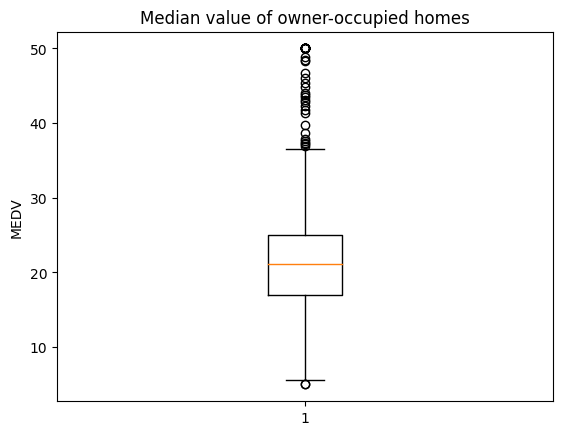

In [10]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel("MEDV")
pyplot.show()

In [13]:
counts = boston_df['CHAS'].value_counts()
counts

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

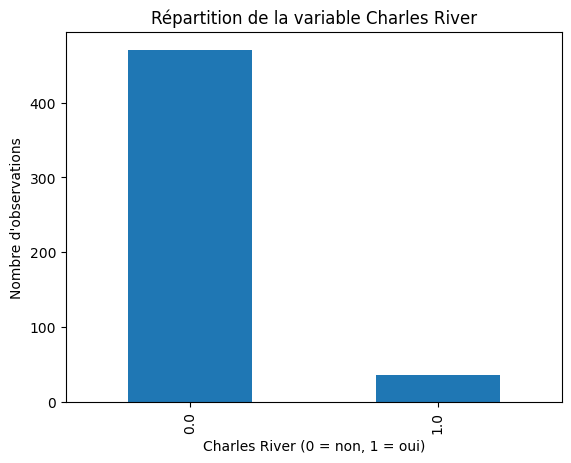

In [14]:
counts.plot(kind='bar')
pyplot.title('Répartition de la variable Charles River')
pyplot.xlabel('Charles River (0 = non, 1 = oui)')
pyplot.ylabel('Nombre d\'observations')
pyplot.show()

35 years and younger, between 35 and 70 years and 70 years and older

In [30]:
boston_df.loc[(boston_df["AGE"]<= 35 ), 'age_groupe'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"]> 35 )&(boston_df["AGE"]< 70), 'age_groupe'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"]>= 70 ), 'age_groupe'] = '70 years and older'

boston_df



,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_groupe
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


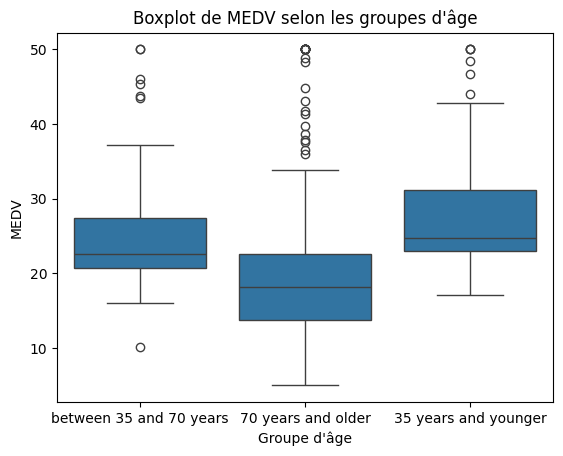

In [31]:
sns.boxplot(x='age_groupe', y='MEDV', data=boston_df)
pyplot.title("Boxplot de MEDV selon les groupes d'âge")
pyplot.xlabel("Groupe d'âge")
pyplot.ylabel("MEDV")
pyplot.show()

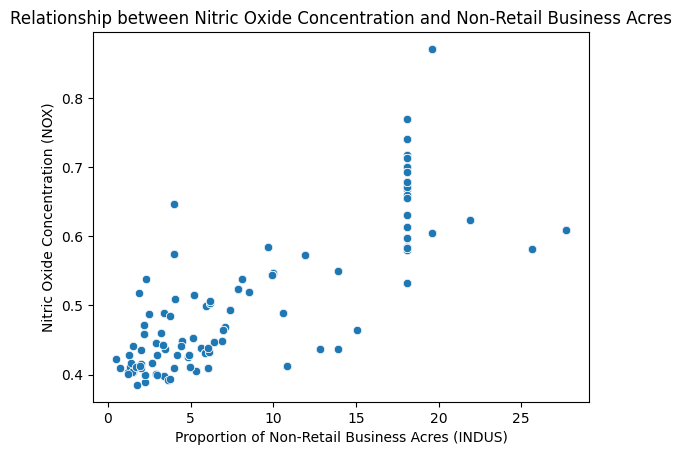

In [34]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Relationship between Nitric Oxide Concentration and Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.show() 

There's a positive correlation between the proportion of non-retail business acres (x-axis) and nitric oxide concentration (y-axis). As the proportion of non-retail commercial areas increases, NOx concentrations tend to rise.

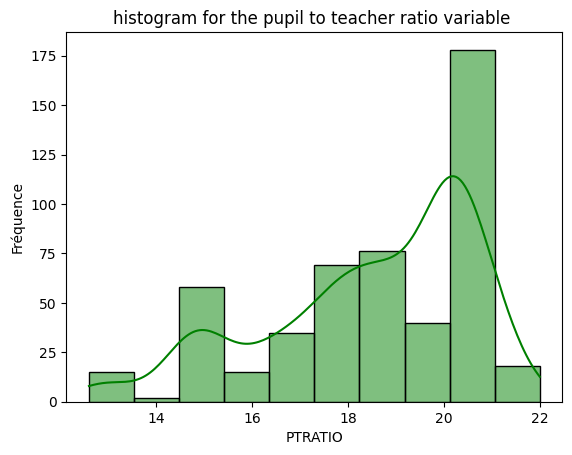

In [36]:
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True, color='green')
pyplot.title("histogram for the pupil to teacher ratio variable ")
pyplot.xlabel("PTRATIO")
pyplot.ylabel("Fréquence")
pyplot.show() 

In [40]:
stats.levene(
    boston_df[boston_df['CHAS'] == 1]['MEDV'],
    boston_df[boston_df['CHAS'] == 0]['MEDV'],
    center='mean'
)


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

the-appropriate-tests


In [41]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)


TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

 p-value < 0.05, reject the null hypothesis, there is a significant difference in house values between the two groups.


there is a significant difference in house values between the two groups.

In [51]:

boston_df.loc[(boston_df["AGE"]<= 35 ), 'age_groupe'] = 'Young_3'
boston_df.loc[(boston_df["AGE"]> 35 )&(boston_df["AGE"]< 70), 'age_groupe'] = 'Middle-aged'
boston_df.loc[(boston_df["AGE"]>= 70 ), 'age_groupe'] = 'old'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_groupe
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Middle-aged
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,old
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Middle-aged
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Middle-aged
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,Middle-aged
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,old
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,old
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,old


In [55]:
group1 = boston_df[boston_df['age_groupe'] == 'Young_3']['MEDV']
group2 = boston_df[boston_df['age_groupe'] == 'Middle-aged']['MEDV']
group3 = boston_df[boston_df['age_groupe'] == 'old']['MEDV']

f_stat, p_value = scipy.stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 36.408
P-value: 0.0000


Null hypothesis (H₀): The mean MEDV is the same across all AGE groups.

Alternative hypothesis (H₁): At least one group's mean MEDV is different.

If p-value < 0.05, reject H₀

significant difference in house values across AGE groups.

In [59]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.764
P-value: 0.0000


No, based on the Pearson correlation results, we cannot conclude that there is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

Here’s why:

The Pearson correlation coefficient is 0.764, which indicates a strong positive linear relationship.

The p-value is effectively 0 (very small), meaning this correlation is statistically significant.

In [60]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        20:47:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An increase in the weighted distance to the employment centers is associated with a significant increase in the median value of homes in Boston.

In other words, the farther a house is from the employment centers, the higher its median value, according to this model.